In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN

In [2]:
df = pd.read_csv('Dry_Bean.csv')
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [4]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [5]:
df.groupby('Class').size()

Class
BARBUNYA    1322
BOMBAY       522
CALI        1630
DERMASON    3546
HOROZ       1928
SEKER       2027
SIRA        2636
dtype: int64

In [6]:
df.Class.value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [7]:
#Duplicados
df.duplicated().value_counts()

False    13543
True        68
Name: count, dtype: int64

In [8]:
#Drop duplicados
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

C:\Users\guido\AppData\Local\Temp\ipykernel_21864\3702687001.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df.Class,


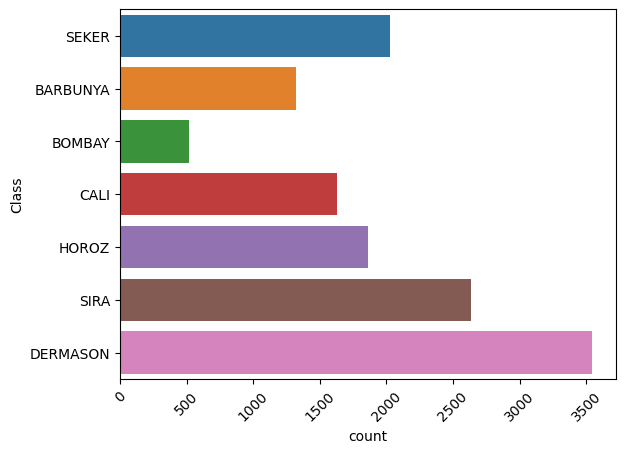

In [12]:
sns.countplot(df.Class, 
              palette='tab10')
plt.xticks(rotation=45)
plt.show()

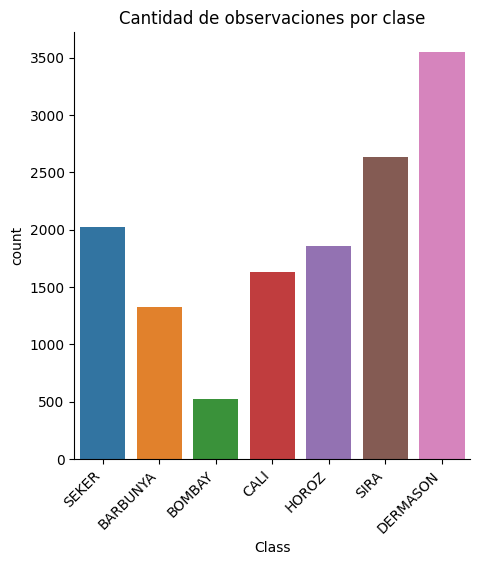

In [13]:
ax = sns.catplot(
    data=df, 
    x='Class', 
    kind='count',
    hue='Class'
    )
plt.xticks(rotation=45, ha='right')
plt.title("Cantidad de observaciones por clase");

In [14]:
#balanceo
undersample = RandomUnderSampler(random_state=42)

In [15]:
X = df.drop('Class',axis=1)
y = df.Class
X_over , y_over = undersample.fit_resample(X,y)

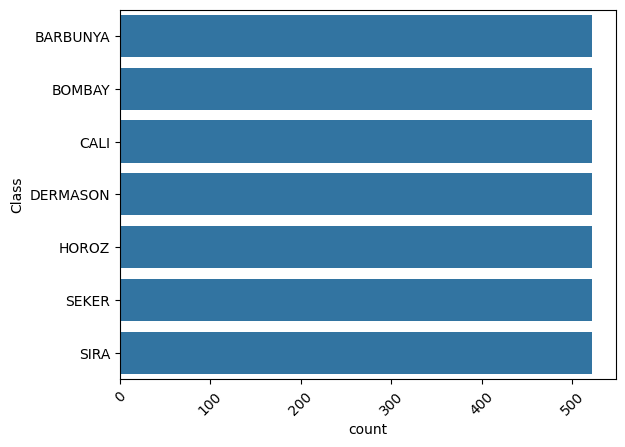

In [16]:
sns.countplot(y_over)
plt.xticks(rotation=45)
plt.show()

In [17]:
y_over

2754    BARBUNYA
2506    BARBUNYA
2267    BARBUNYA
2449    BARBUNYA
2076    BARBUNYA
          ...   
8692        SIRA
7578        SIRA
7924        SIRA
9972        SIRA
9720        SIRA
Name: Class, Length: 3654, dtype: object

In [18]:
X_over

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
2754,70776,1060.894,386.619944,234.100208,1.651515,0.795842,71978,300.191276,0.775763,0.983300,0.790227,0.776451,0.005463,0.001225,0.602875,0.995658
2506,66370,1004.139,339.287072,249.883085,1.357783,0.676443,67637,290.697280,0.720536,0.981268,0.827169,0.856789,0.005112,0.001699,0.734087,0.996731
2267,60736,985.501,342.445302,226.741775,1.510288,0.749393,61680,278.085377,0.789353,0.984695,0.785854,0.812058,0.005638,0.001512,0.659438,0.995941
2449,65219,1011.110,353.650546,235.308999,1.502920,0.746512,66672,288.165594,0.719436,0.978207,0.801654,0.814831,0.005423,0.001475,0.663950,0.997864
2076,51332,889.637,330.822804,198.618899,1.665616,0.799716,52283,255.651975,0.751688,0.981811,0.815028,0.772776,0.006445,0.001418,0.597183,0.994678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,44358,785.631,288.303275,196.970714,1.463686,0.730225,44898,237.651761,0.791937,0.987973,0.903118,0.824312,0.006499,0.001851,0.679490,0.994560
7578,37641,742.538,284.313737,169.740814,1.674987,0.802227,38112,218.920099,0.744187,0.987642,0.857894,0.769995,0.007553,0.001638,0.592892,0.993087
7924,40668,747.000,271.731569,191.687622,1.417575,0.708780,41257,227.552424,0.712162,0.985724,0.915844,0.837416,0.006682,0.002027,0.701266,0.994097
9972,53233,893.511,329.969126,206.375684,1.598876,0.780273,54022,260.342775,0.689154,0.985395,0.837898,0.788991,0.006199,0.001482,0.622507,0.995312


In [21]:
#Balanceo con smote()
oversample = SMOTE()
x_rsmote, y_rsmote = oversample.fit_resample(X,y)

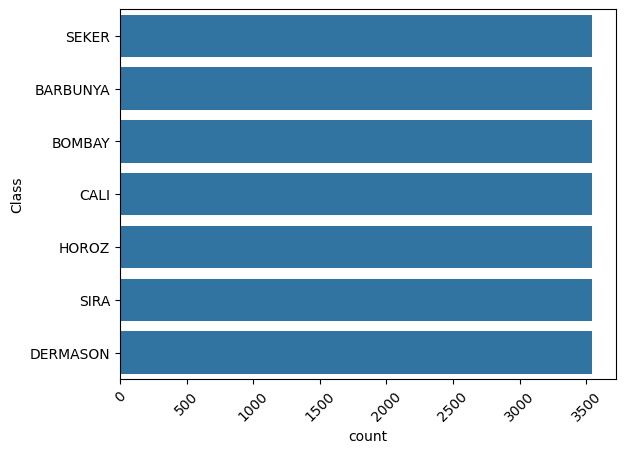

In [22]:
sns.countplot(y_rsmote)
plt.xticks(rotation=45)
plt.show()

In [26]:
#Conversión a numéricos el label CLass
list(np.unique(y_over)) #Muetra la lista sin repeticiones
y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [1,2,3,4,5,6,7], inplace=True)

In [27]:
list(np.unique(y_over))

[1, 2, 3, 4, 5, 6, 7]

In [28]:
#Análisis exploratorio de datos
df_dea = X_over
df_dea['Class'] = y_over

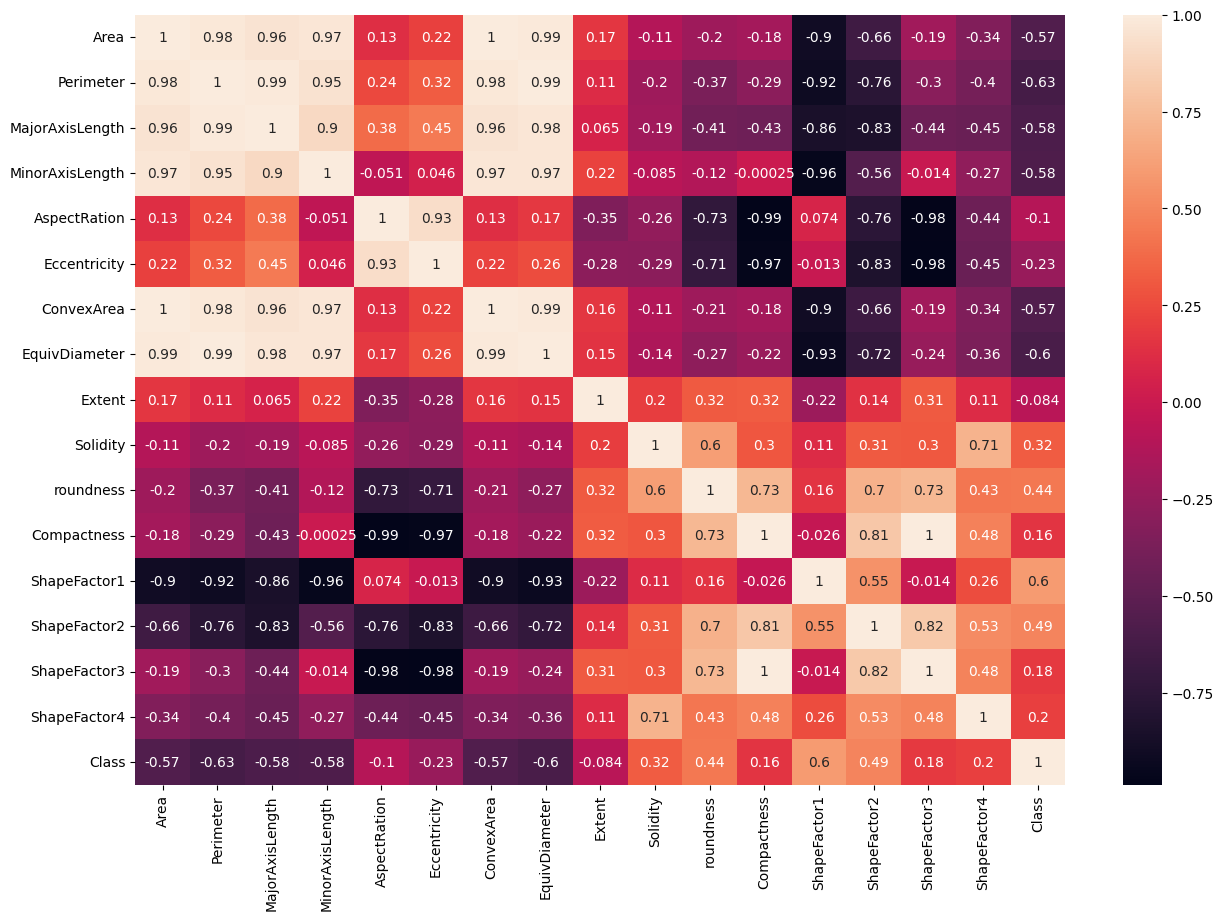

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dea.corr(), annot=True)
plt.show()

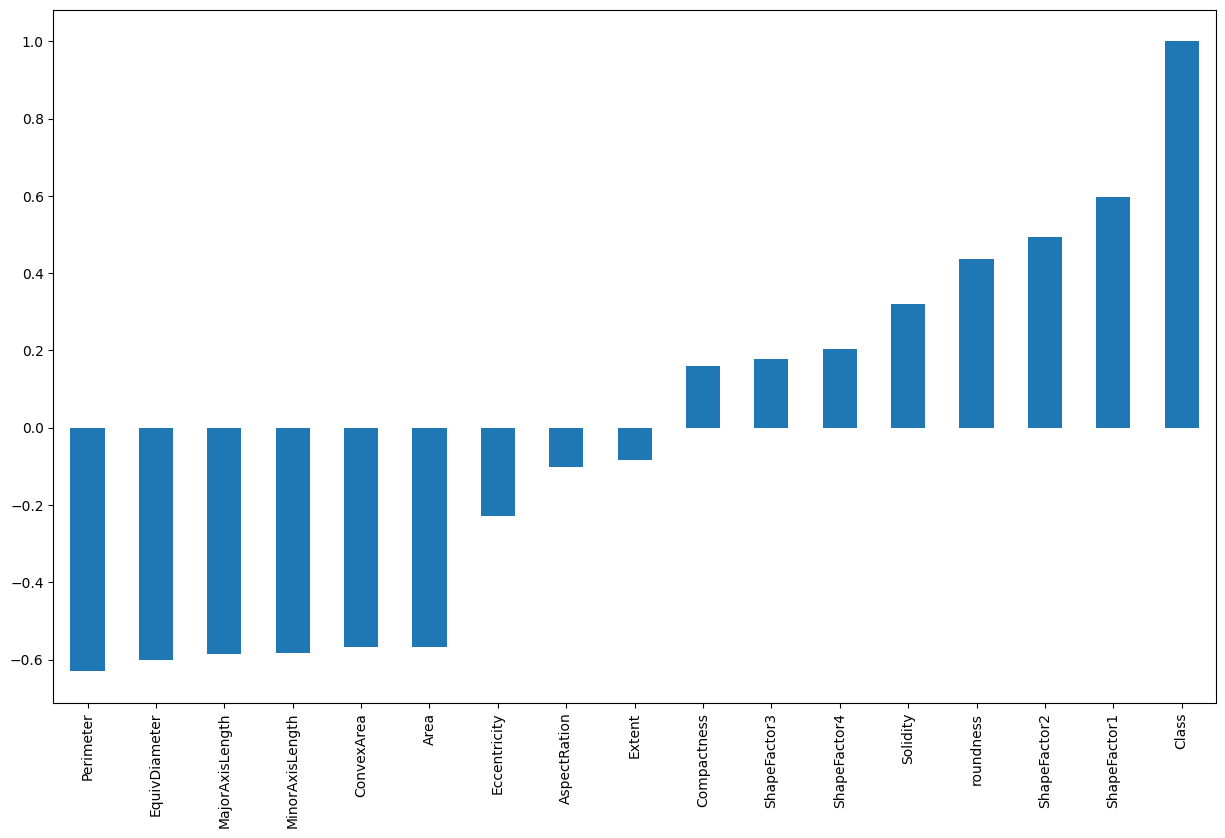

In [30]:
fig = plt.figure(figsize=(15,9))
df_dea.corr()['Class'].sort_values(ascending=True).plot(kind='bar')
plt.show()

In [31]:
#Eliminamos variables que producen colinealidad
X_over.drop(['ConvexArea','EquivDiameter'], axis=1, inplace=True) 

In [32]:
#Split y escalamiento de datos
X_train, X_test, y_train , y_test = train_test_split(X_over, y_over, random_state=42, shuffle=True, test_size= .2)
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train) 
X_test = st_x.transform(X_test)

# Modelo de Regresión Logística


https://aprendeia.com/algoritmo-regresion-logistica-machine-learning-teoria/

In [33]:
#MODELO 1 CON SAMPLING RECORTADO
lrmodel1 = LogisticRegression(random_state=42, solver='saga', multi_class='multinomial', n_jobs=-1, C=1 )
lrmodel1

LogisticRegression(C=1, multi_class='multinomial', n_jobs=-1, random_state=42,
                   solver='saga')

In [39]:
lrmodel1.fit(X_train, y_train)
predictions=lrmodel1.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(f'Presicion de Accuracy {accuracy_score(y_test,predictions)}')
print('Precisión Regresión Logística: {}'.format(lrmodel1.score(X_train, y_train)))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   0   0  89   2]
 [  0   0   0   0   0   0 110]]
0.9931600547195623
Presicion de Accuracy 0.9931600547195623
Precisión Regresión Logística: 0.9941840574751967


D:\Proyectos\ML\envprueba\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


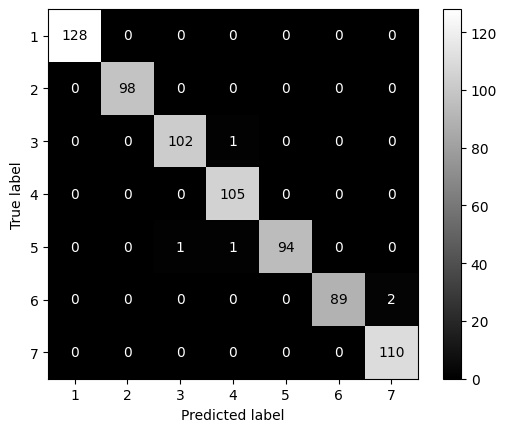

In [35]:
cm = confusion_matrix(y_test, predictions, labels=lrmodel1.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lrmodel1.classes_)
disp.plot(cmap='gray')
plt.show()

In [36]:
#Reporte de metricas
predicciones=lrmodel1.predict(X_test).reshape(-1,1)
print(classification_report(y_test,predicciones))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       128
           2       1.00      1.00      1.00        98
           3       0.99      0.99      0.99       103
           4       0.98      1.00      0.99       105
           5       1.00      0.98      0.99        96
           6       1.00      0.98      0.99        91
           7       0.98      1.00      0.99       110

    accuracy                           0.99       731
   macro avg       0.99      0.99      0.99       731
weighted avg       0.99      0.99      0.99       731



# MODELO 2 CON SAMPLING COMPLETADO x_rsmote, y_rsmote


In [40]:
#MODELO 2 CON SAMPLING COMPLETADO x_rsmote, y_rsmote
#Split y escalamiento de datos
y_rsmote.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [1,2,3,4,5,6,7], inplace=True)
X_train2,X_test2,y_train2,y_test2=train_test_split(x_rsmote, y_rsmote, random_state=42, shuffle=True, test_size= .2)
st_x2 = StandardScaler()
X_train2 = st_x2.fit_transform(X_train2) 
X_test2 = st_x2.transform(X_test2)

C:\Users\guido\AppData\Local\Temp\ipykernel_21864\214719741.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_rsmote.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [1,2,3,4,5,6,7], inplace=True)


In [41]:
lrmodel2 = LogisticRegression(random_state=42, solver='saga', multi_class='multinomial', n_jobs=-1, C=1 )
lrmodel2

LogisticRegression(C=1, multi_class='multinomial', n_jobs=-1, random_state=42,
                   solver='saga')

In [42]:
lrmodel2.fit(X_train2, y_train2)
predictions = lrmodel2.predict(X_test2)
print(confusion_matrix(y_test2,predictions))
print(accuracy_score(y_test2,predictions))
print('Precisión Regresión Logística: {}'.format(lrmodel2.score(X_train2, y_train2)))

[[685   0  26   0   1   0   5]
 [  0 715   0   0   0   0   0]
 [ 15   0 697   0  11   2   2]
 [  1   0   0 640   1  10  63]
 [  3   0   9   8 678   0   5]
 [  5   0   0   6   0 662  18]
 [  1   0   4  42  15  14 621]]
0.9462235649546827
Precisión Regresión Logística: 0.9423880747343506


D:\Proyectos\ML\envprueba\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


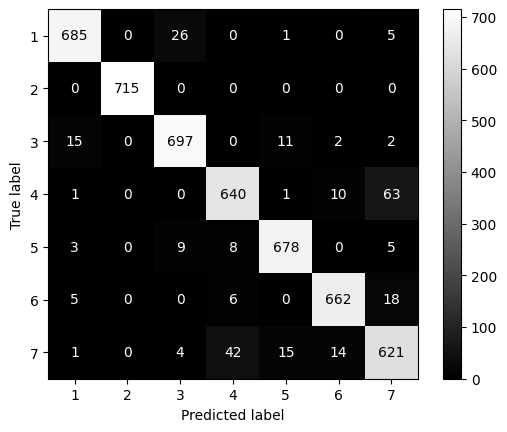

In [43]:
cm = confusion_matrix(y_test2, predictions, labels=lrmodel2.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lrmodel2.classes_)
disp.plot(cmap='gray')
plt.show()

In [53]:
#Reporte de metricas
predicciones=lrmodel2.predict(X_test2).reshape(-1,1)
print(classification_report(y_test2,predicciones))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96       717
           2       1.00      1.00      1.00       715
           3       0.95      0.96      0.95       727
           4       0.92      0.90      0.91       715
           5       0.96      0.96      0.96       703
           6       0.96      0.96      0.96       691
           7       0.87      0.89      0.88       697

    accuracy                           0.95      4965
   macro avg       0.95      0.95      0.95      4965
weighted avg       0.95      0.95      0.95      4965



# Modelo de Máquinas de Vectores de Soporte


https://aprendeia.com/maquinas-vectores-de-soporte-clasificacion-teoria/

In [45]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
#Modelo de Máquinas de Vectores de Soporte
#Create a svm Classifier
svm1 = svm.SVC(kernel='linear') # Linear Kernel
svm1

SVC(kernel='linear')

In [47]:
#Train the model using the training sets
svm1.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = svm1.predict(X_test)

In [48]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print('Precisión SVM: {}'.format(svm1.score(X_train, y_train)))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 103   0   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   0   0  96   0   0]
 [  0   0   0   0   0  91   0]
 [  0   0   0   0   0   0 110]]
1.0
Precisión SVM: 0.9993157714676703


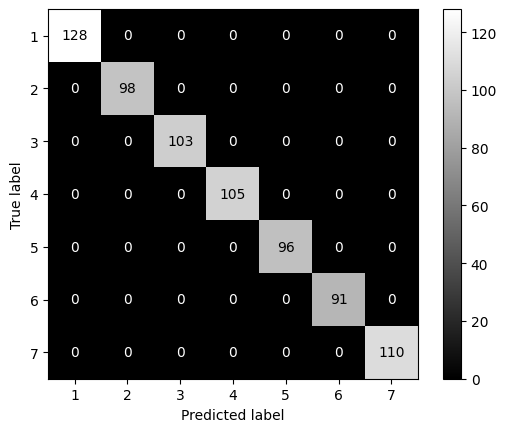

In [49]:
cm = confusion_matrix(y_test, y_pred, labels=svm1.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm1.classes_)
disp.plot(cmap='gray')
plt.show()

In [50]:
#Reporte de metricas
predicciones=svm1.predict(X_test).reshape(-1,1)
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       128
           2       1.00      1.00      1.00        98
           3       1.00      1.00      1.00       103
           4       1.00      1.00      1.00       105
           5       1.00      1.00      1.00        96
           6       1.00      1.00      1.00        91
           7       1.00      1.00      1.00       110

    accuracy                           1.00       731
   macro avg       1.00      1.00      1.00       731
weighted avg       1.00      1.00      1.00       731



In [54]:
#Data completa
svm2 = svm.SVC(kernel='linear') # Linear Kernel
svm2.fit(X_train2, y_train2)
y_pred2 = svm2.predict(X_test2)

In [55]:
print(confusion_matrix(y_test2,y_pred2))
print(accuracy_score(y_test2,y_pred2))
print('Precisión SVM2: {}'.format(svm2.score(X_train2, y_train2)))

[[687   0  24   0   1   0   5]
 [  0 715   0   0   0   0   0]
 [ 15   0 697   0  10   2   3]
 [  2   0   0 655   0  10  48]
 [  2   0   7   8 681   0   5]
 [  5   0   0   8   0 661  17]
 [  3   0   3  48  14  12 617]]
0.9492447129909366
Precisión SVM2: 0.9458629198771215


In [56]:
#Reporte de metricas MODELO SVM 2
predicciones2=svm2.predict(X_test2).reshape(-1,1)
print(classification_report(y_test2,predicciones2))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96       717
           2       1.00      1.00      1.00       715
           3       0.95      0.96      0.96       727
           4       0.91      0.92      0.91       715
           5       0.96      0.97      0.97       703
           6       0.96      0.96      0.96       691
           7       0.89      0.89      0.89       697

    accuracy                           0.95      4965
   macro avg       0.95      0.95      0.95      4965
weighted avg       0.95      0.95      0.95      4965



# KNeighborsClassifier - Modelo de Vecinos más Cercanos


https://aprendeia.com/algoritmo-k-vecinos-mas-cercanos-teoria-machine-learning/

In [57]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=3)

In [58]:
y_pred = knn.predict(X_test)

In [59]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print('Precisión KNN: {}'.format(svm1.score(X_train, y_train)))

[[126   0   2   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   1   0  89   1]
 [  0   0   0   0   1   0 109]]
0.9890560875512996
Precisión KNN: 0.9993157714676703


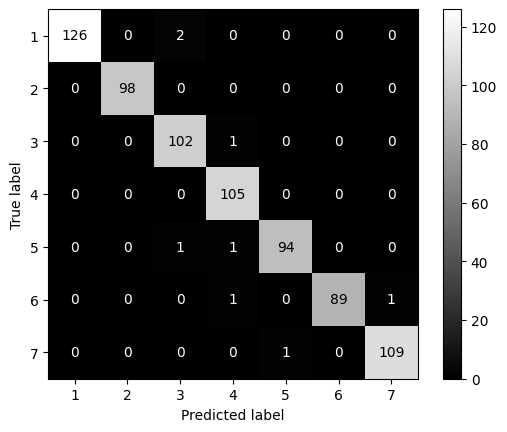

In [60]:
cm = confusion_matrix(y_test, y_pred, labels=svm1.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm1.classes_)
disp.plot(cmap='gray')
plt.show()

#Con toda la data
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train2, y_train2)
y_pred2 = knn2.predict(X_test2)

In [62]:
print(confusion_matrix(y_test2,y_pred2))
print(f'Accuracy {accuracy_score(y_test2,y_pred2)}')
print('Precisión KNN2: {}'.format(knn2.score(X_train2, y_train2)))

[[696   0  14   0   2   0   5]
 [  0 715   0   0   0   0   0]
 [ 19   0 700   0   7   0   1]
 [  1   0   0 644   1  13  56]
 [  1   0   9   5 678   0  10]
 [  5   0   0   9   0 660  17]
 [  4   0   4  53  10   8 618]]
Accuracy 0.9488418932527694
Precisión KNN2: 0.971395477665307


In [63]:
#Reporte de metricas MODELO SVM 2
predicciones3=knn2.predict(X_test2).reshape(-1,1)
print(classification_report(y_test2,predicciones3))

              precision    recall  f1-score   support

           1       0.96      0.97      0.96       717
           2       1.00      1.00      1.00       715
           3       0.96      0.96      0.96       727
           4       0.91      0.90      0.90       715
           5       0.97      0.96      0.97       703
           6       0.97      0.96      0.96       691
           7       0.87      0.89      0.88       697

    accuracy                           0.95      4965
   macro avg       0.95      0.95      0.95      4965
weighted avg       0.95      0.95      0.95      4965



# Modelo de Árboles de Decisión Clasificación

https://aprendeia.com/arboles-de-decision-clasificacion-teoria-machine-learning/

In [64]:
# Create Decision Tree classifer object
TreeModel=DecisionTreeClassifier()
# Train Decision Tree Classifer
TreeModel=TreeModel.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = TreeModel.predict(X_test)
TreeModel

DecisionTreeClassifier()

In [65]:
print(confusion_matrix(y_test,y_pred))
print(f'Accuracy {accuracy_score(y_test,y_test)}')
print('Precisión: {}'.format(TreeModel.score(X_train, y_train)))

[[127   0   0   1   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 103   0   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   0   0  96   0   0]
 [  0   0   0   0   0  91   0]
 [  0   0   0   0   0   0 110]]
Accuracy 1.0
Precisión: 1.0


In [66]:
#Con toda la data
TreeModel2=DecisionTreeClassifier()
TreeModel2=TreeModel2.fit(X_train2,y_train2)
y_pred2 = TreeModel2.predict(X_test2)

In [67]:
print(confusion_matrix(y_test2,y_pred2))
print(f'Accuracy {accuracy_score(y_test2,y_pred2)}')
print('Precisión: {}'.format(knn2.score(X_train2, y_train2)))

[[690   0  16   0   4   2   5]
 [  1 714   0   0   0   0   0]
 [ 21   0 685   0  14   1   6]
 [  0   0   0 636   1  16  62]
 [  4   0  15   8 662   0  14]
 [  5   0   0  13   0 656  17]
 [ 12   0   6  59  13  10 597]]
Accuracy 0.9345417925478349
Precisión: 0.971395477665307
